## Before we start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Aug 15 14:25:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Problem at hand


*   Classifying images of coins into 15 classes.
*   [Dataset link](https://www.kaggle.com/datasets/bashturtle/globecoins)


---
## Challenges



*   Images are highly variable in size and quality and cannot be passed directly into the Deep CNN for classification.
*   Need to build up a method for efficient classification.


---

## Proposed solution

Localizing the coins from the images in the dataset using **YOLOV8 object detection model** and then classifying the much more sophisticated dataset.

[Roboflow annotated data](https://universe.roboflow.com/naeem-khan/coin-dataset-x7law/dataset/1)





## Preparing a custom dataset (Source: Roboflow)

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your-API-KEY")
project = rf.workspace("zubair-atha-ftapn").project("coin-detect-jrf9g")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e01a65873dd806694f9b5c1948577791c29aa2b40300175c6e22622af87aef90
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to coin-detect-1 in yolov8:: 100%|██████████| 1602/1602 [00:00<00:00, 2062.52it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True
# !yolo task=detect mode=train model=yolov8s.pt data=/content/coin-detect-1/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 69.1MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/coin-detect-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch2.jpg
confusion_matrix.png				   train_batch585.jpg
events.out.tfevents.1692102075.71ee528bfda8.916.0  train_batch586.jpg
F1_curve.png					   train_batch587.jpg
P_curve.png					   val_batch0_labels.jpg
PR_curve.png					   val_batch0_pred.jpg
R_curve.png					   val_batch1_labels.jpg
results.csv					   val_batch1_pred.jpg
results.png					   val_batch2_labels.jpg
train_batch0.jpg				   val_batch2_pred.jpg
train_batch1.jpg				   weights


/content


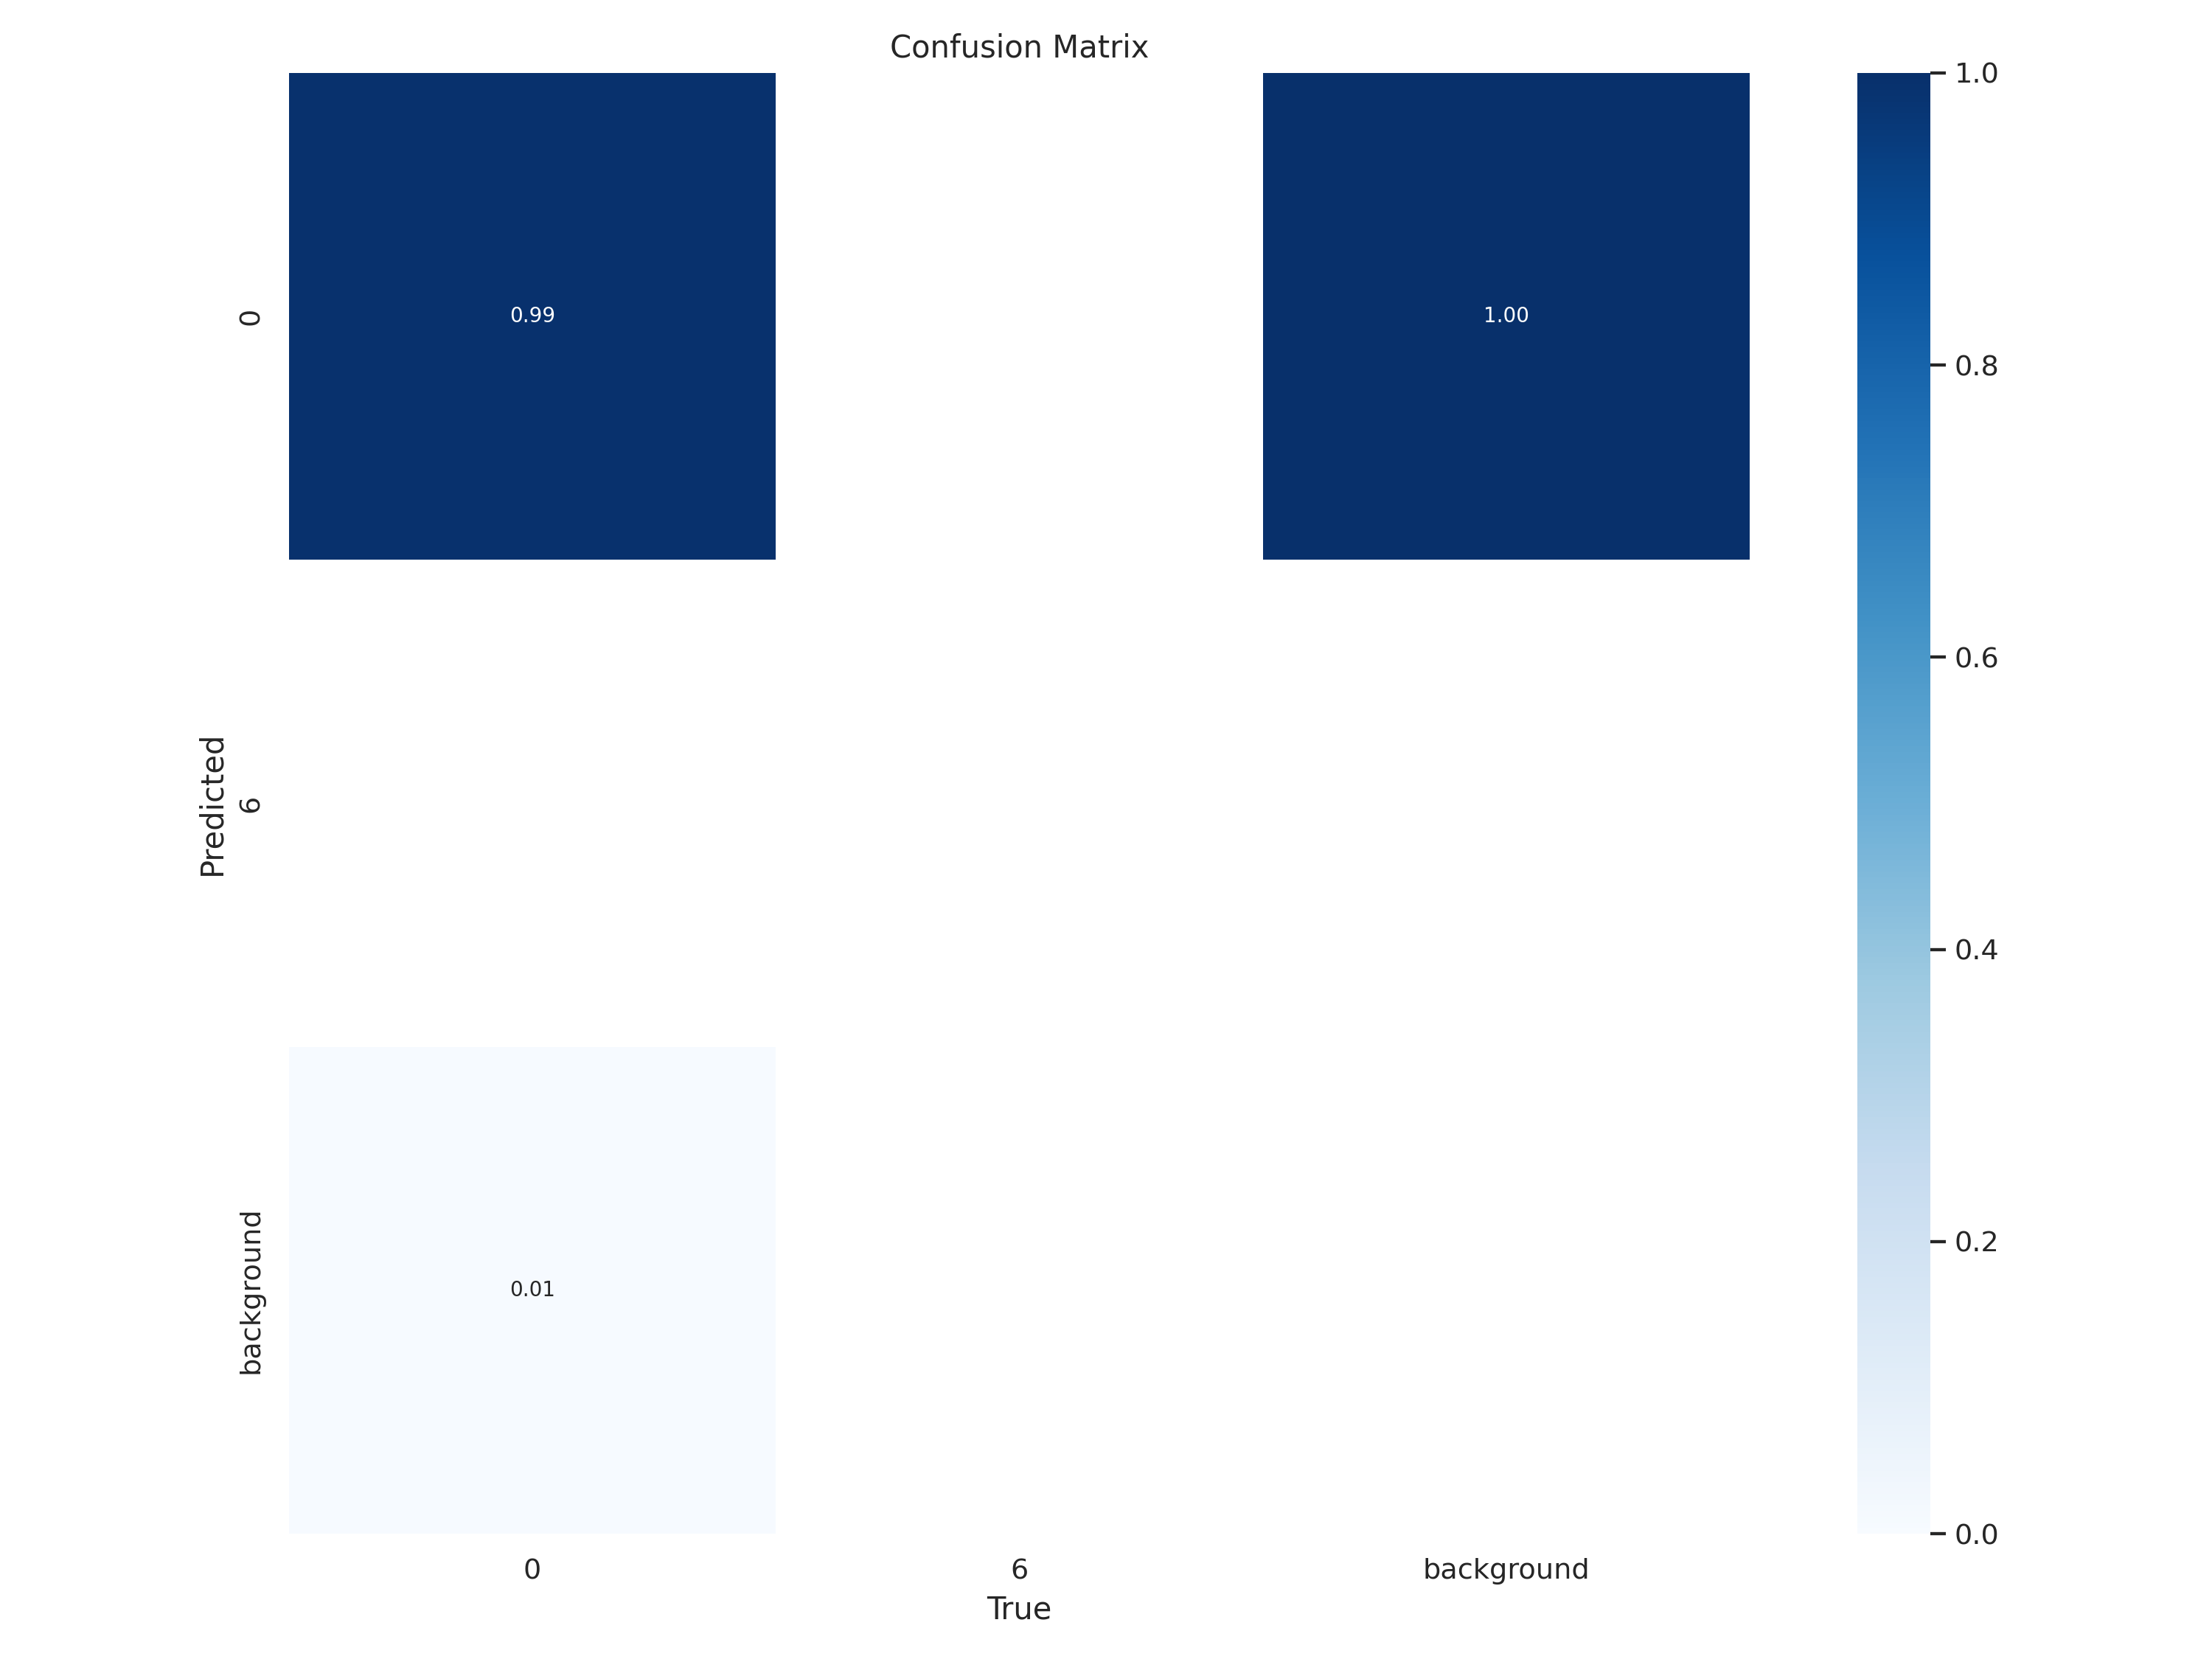

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


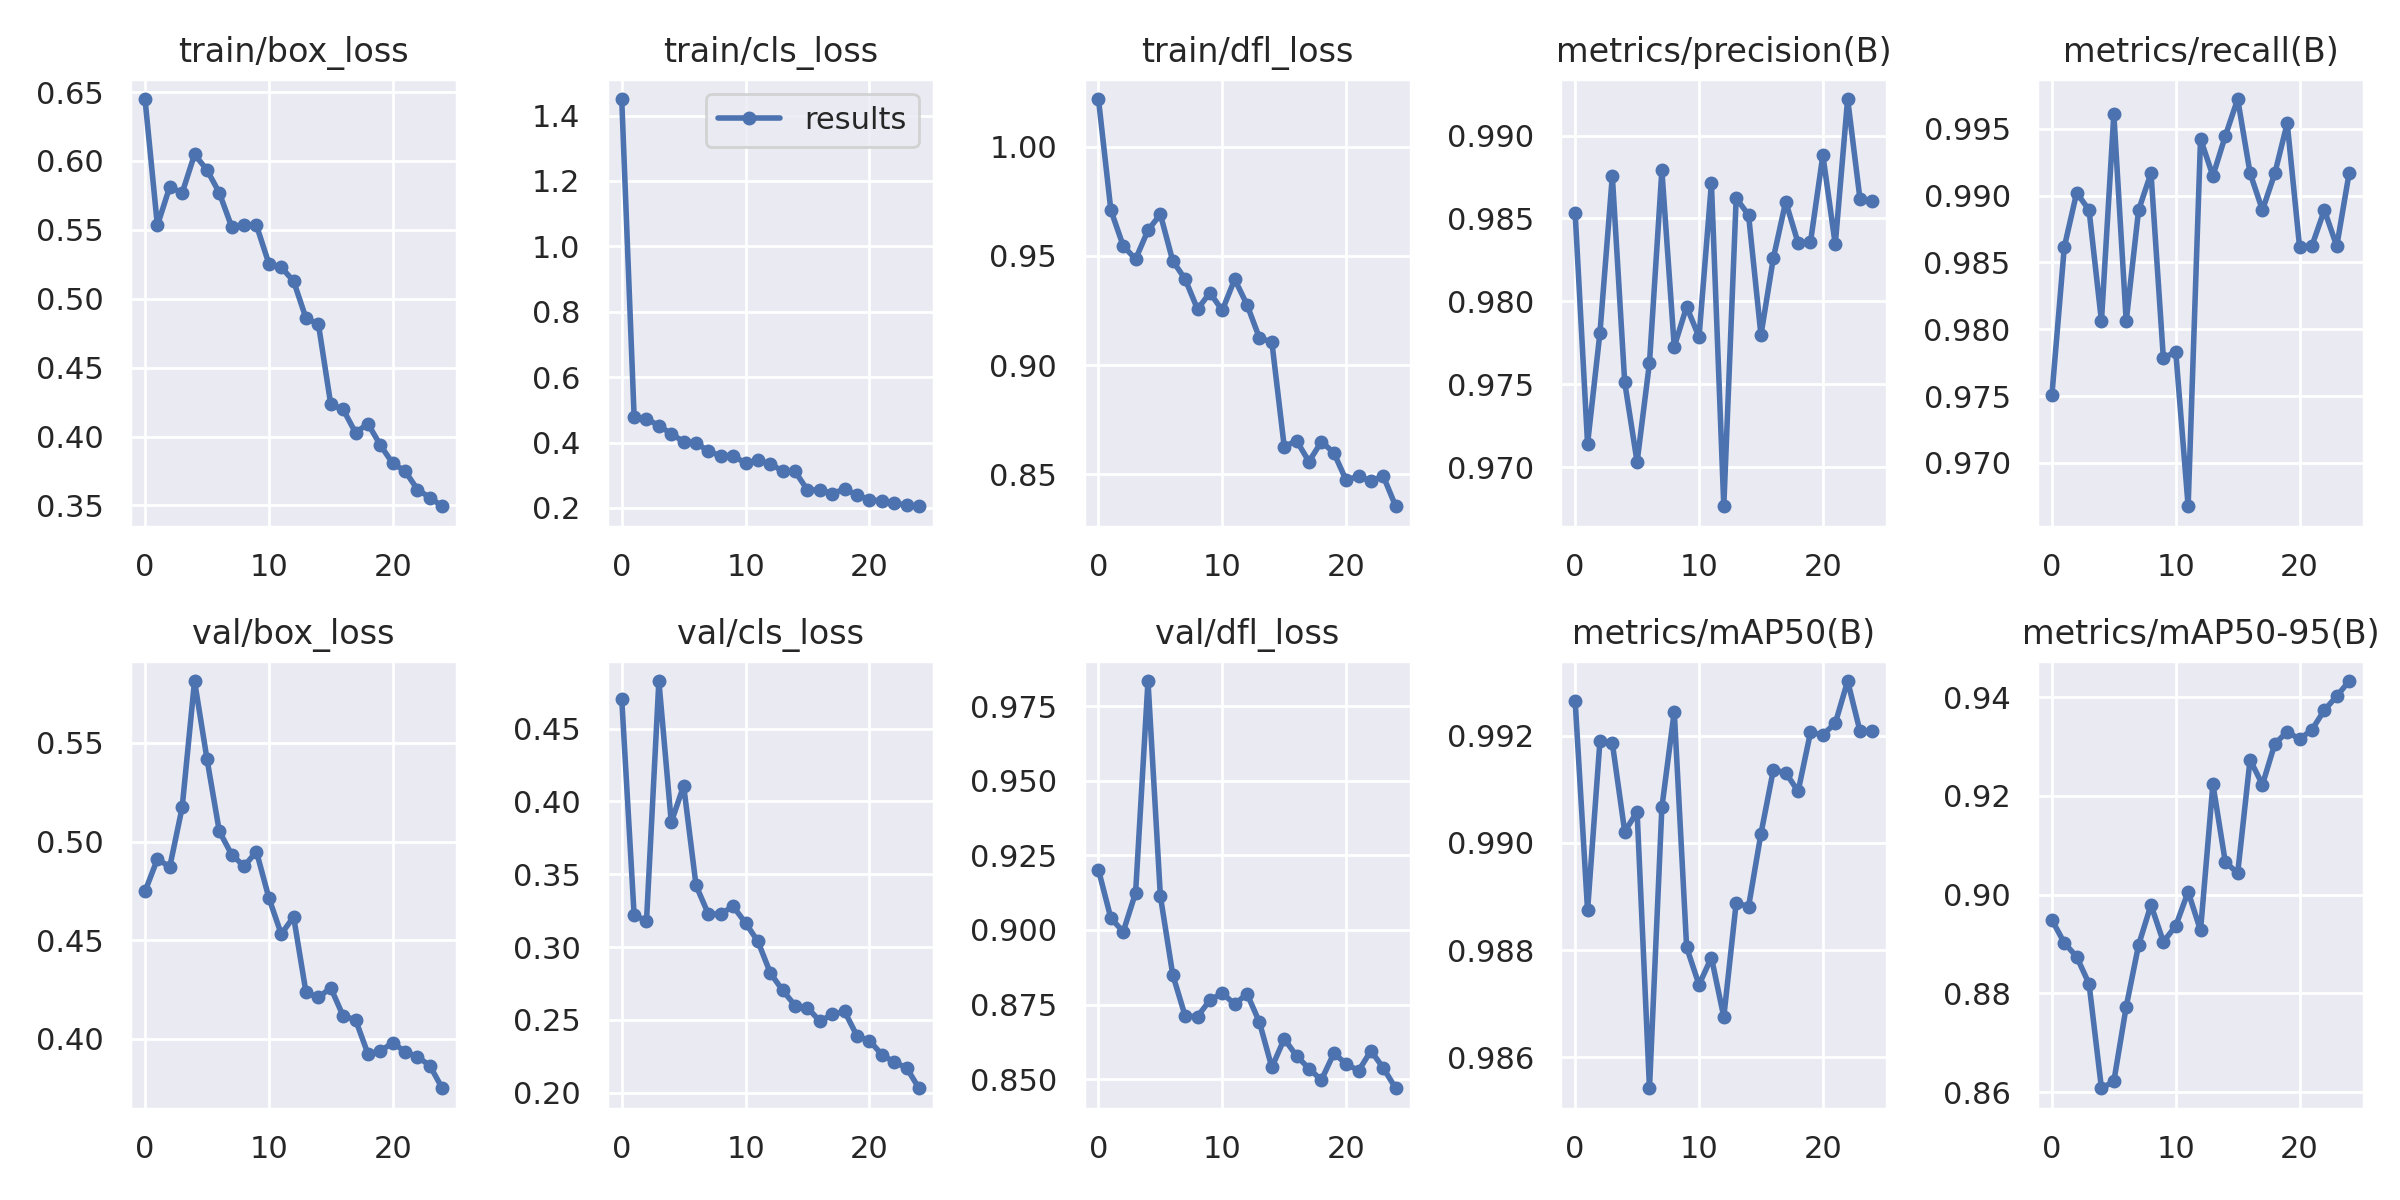

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


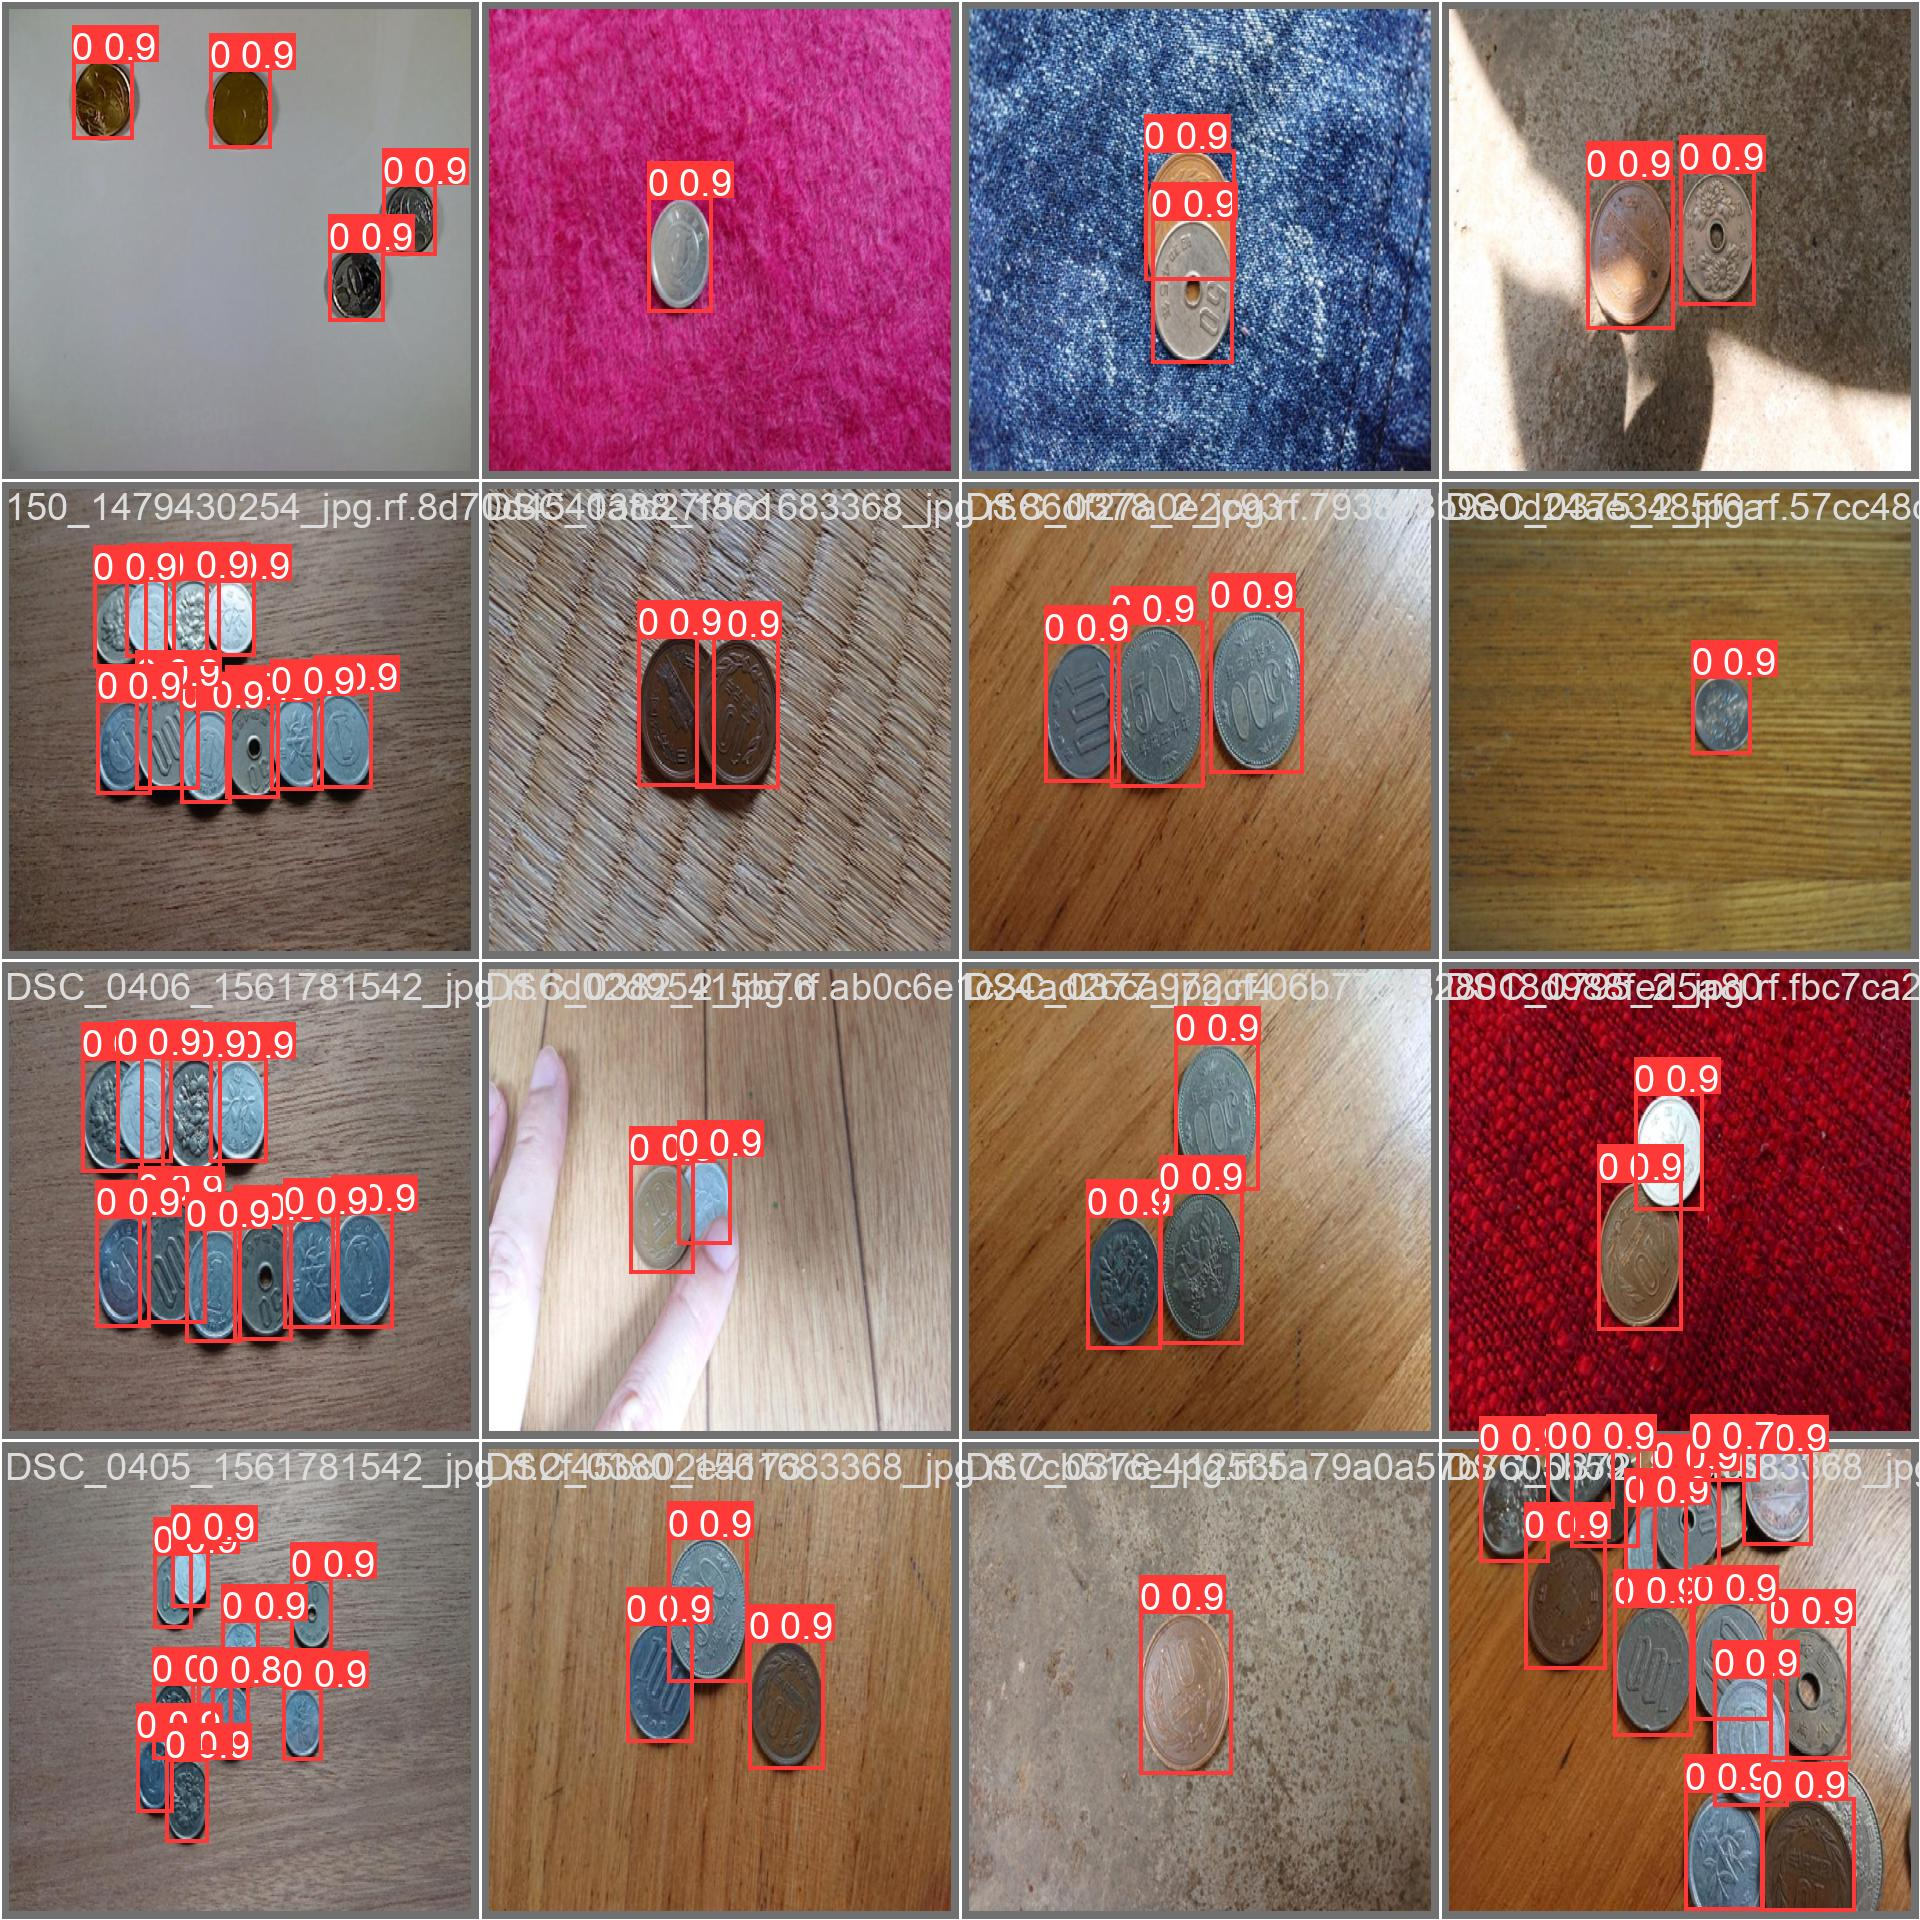

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-15 12:38:32.262078: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 12:38:33.136341: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/coin-detect-1/valid/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100% 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:06<00:00,  1.16it/s]
                   all        120        361      0.986      0.992      0.992      0.941
                     0        120     

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-15 12:39:40.833767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 12:39:41.711144: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/60 /content/datasets/coin-detect-1/test/images/001_jpg.rf.ed6490a928fccf917bbc31dcb7c2bb51.jpg: 800x800 2 0s, 24.6ms
image 2/60 /content/datasets/coin-detect-1/test/images/00334d13-4962-4b53-9dd2-121f8f000beb_jpg.rf.298e3d4b3e4f0e2131bf9c46010cbdcf.jpg: 800x800 1 0, 24.7ms
image 3/60 /content/datasets/coin-detect-1/test/images/0044de2f-d45b-4526-99eb-adf982d98b05_jpg.rf.1ae4eb

**NOTE:** Let's take a look at few results.

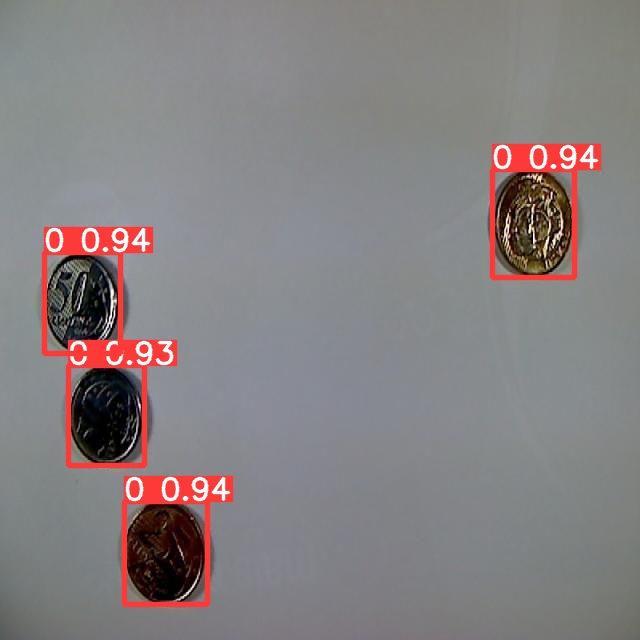

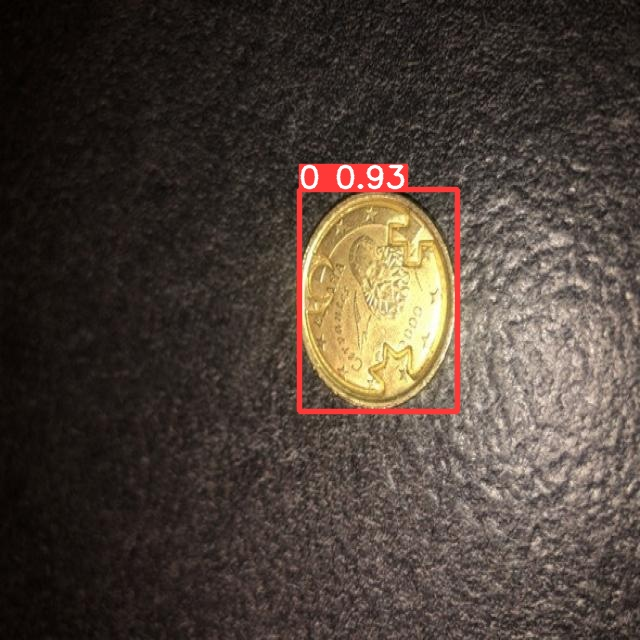

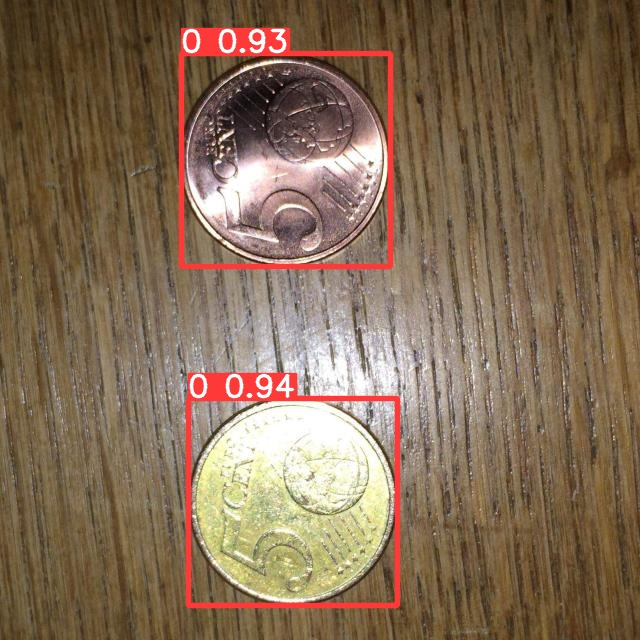

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
model = project.version(dataset.version).model

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 14379c1f-5954-4138-8e19-c118b3ecc7b5_jpg.rf.726d9f746ac46567c86976052b508b2d.jpg


{'predictions': [{'x': 311.5,
   'y': 353.5,
   'width': 195.0,
   'height': 343.0,
   'confidence': 0.9586361646652222,
   'class': '0',
   'image_path': '/content/datasets/coin-detect-1/test/images/14379c1f-5954-4138-8e19-c118b3ecc7b5_jpg.rf.726d9f746ac46567c86976052b508b2d.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

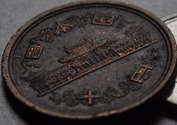

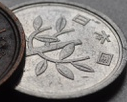

In [ ]:
import cv2
import torch
import numpy as np
from google.colab.patches import cv2_imshow

# Load the original image
image_path = '<your image path>'
original_image = cv2.imread(image_path)

pred = model.predict(image_path, confidence=40, overlap=30)

for i in range(len(pred)):
    x1,y1,x2,y2 = int(pred[i]['x']-pred[i]['width']/2),int(pred[i]['y']-pred[i]['height']/2),int(pred[i]['x']+pred[i]['width']/2),int(pred[i]['y']+pred[i]['height']/2)
    cropped_image = original_image[y1:y2, x1:x2]
    cv2_imshow(cropped_image)

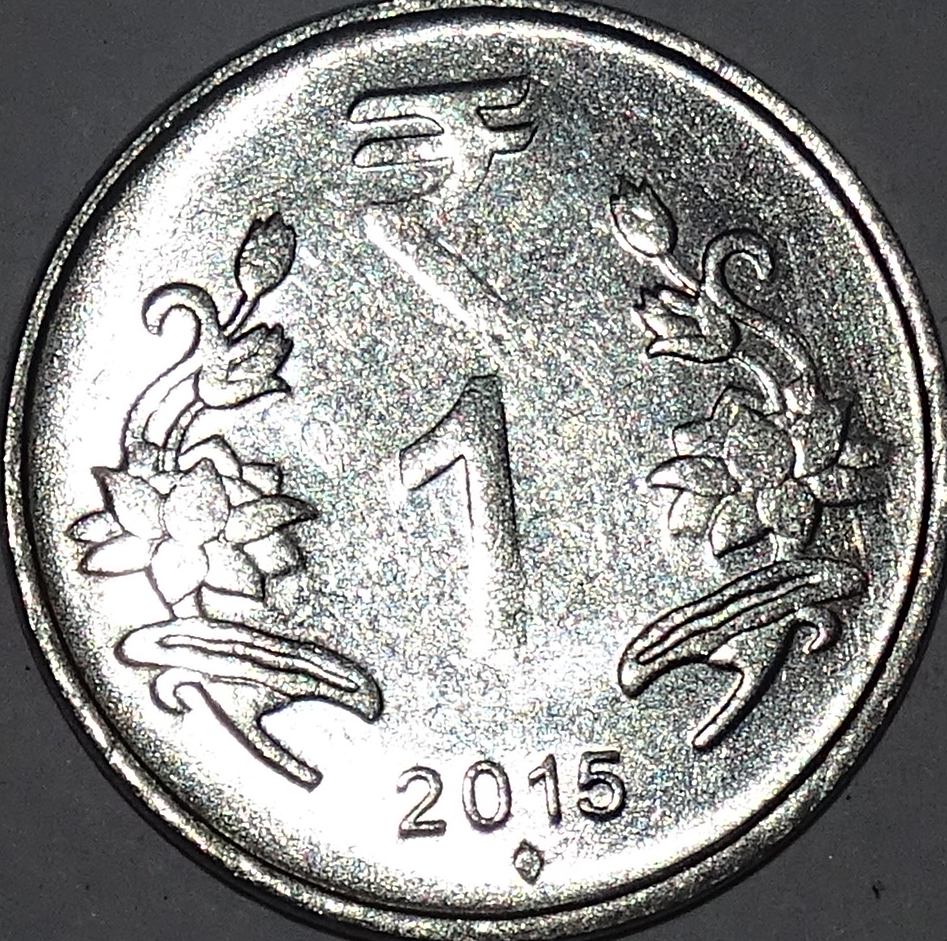

In [ ]:
# x1,y1,x2,y2
import cv2
import torch
import numpy as np
from google.colab.patches import cv2_imshow
# pred = model.predict('/content/rupee1_009.JPG', confidence=40, overlap=30)
x1,y1,x2,y2 = int(pred[0]['x']-pred[0]['width']/2),int(pred[0]['y']-pred[0]['height']/2),int(pred[0]['x']+pred[0]['width']/2),int(pred[0]['y']+pred[0]['height']/2)
image_path = '<your image path>'
original_image = cv2.imread(image_path)
cropped_image = original_image[y1:y2, x1:x2]
cv2_imshow(cropped_image)

## Kaggle Dataset

### Setup

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
# Add kaggle.json file to /content prior to running this
! cp '/content/kaggle.json' ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download bashturtle/globecoins

100% 3.08G/3.08G [02:02<00:00, 19.3MB/s]
100% 3.08G/3.08G [02:02<00:00, 26.9MB/s]


In [ ]:
! unzip '/content/datasets/globecoins.zip'

### Make new dataset with localized images of coins using YOLOv8

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
from tqdm import tqdm

# Path to the folders containing images
input_base_path = '/content/datasets'
output_base_path = '/content/datasets/cropped_images'

# Loop through train, test, and valid folders
for folder_name in ['train', 'test', 'valid']:
# for folder_name in ['valid']:
    input_folder_path = os.path.join(input_base_path, folder_name)
    output_folder_path = os.path.join(output_base_path, folder_name)
    print(f"------------------{folder_name} data------------------")
    # Loop through subfolders (1, 2, ..., 15)
    for subfolder in tqdm(os.listdir(input_folder_path)):
    # for subfolder in ['1']:
        subfolder_path = os.path.join(input_folder_path, subfolder)
        output_subfolder_path = os.path.join(output_folder_path, subfolder)

        # Create output subfolder if it doesn't exist
        os.makedirs(output_subfolder_path, exist_ok=True)

        # Loop through images in the subfolder
        for image_name in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_name)

            # Load the original image
            original_image = cv2.imread(image_path)

            # Perform bounding box prediction
            pred = model.predict(image_path, confidence=40, overlap=30)

            # Loop through bounding box predictions and save cropped images
            for i in range(len(pred)):
                x1, y1, x2, y2 = int(pred[i]['x'] - pred[i]['width'] / 2), int(pred[i]['y'] - pred[i]['height'] / 2), int(
                    pred[i]['x'] + pred[i]['width'] / 2), int(pred[i]['y'] + pred[i]['height'] / 2)
                cropped_image = original_image[y1:y2, x1:x2]

                # Save the cropped image
                output_image_path = os.path.join(output_subfolder_path, f"cropped_{image_name}_{i}.jpg")
                cv2.imwrite(output_image_path, cropped_image)


------------------train data------------------


100%|██████████| 15/15 [44:11<00:00, 176.78s/it]


------------------test data------------------


100%|██████████| 15/15 [05:23<00:00, 21.59s/it]


------------------valid data------------------


100%|██████████| 15/15 [04:59<00:00, 19.98s/it]


### Dataset image
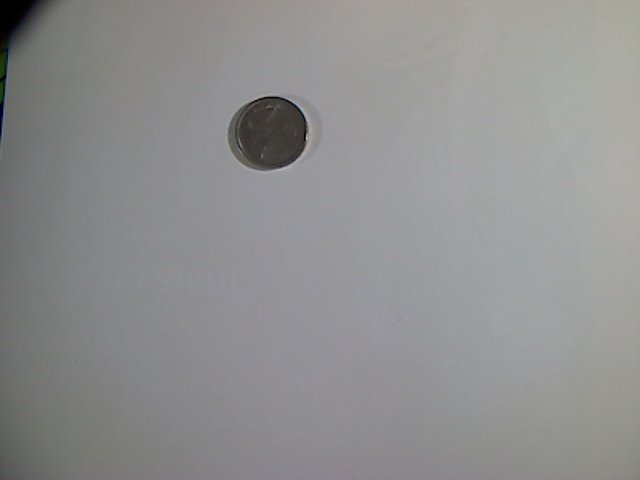

### Localized image

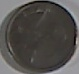

That works well!

In [ ]:
import shutil

# Define the source folder path that you want to zip
source_folder_path = '/content/datasets/cropped_images'

# Define the destination zip file path
destination_zip_path = '/content/datasets/cropped_images.zip'

# Use the shutil library to create a zip archive of the folder
shutil.make_archive(destination_zip_path[:-4], 'zip', source_folder_path)

print(f"Folder '{source_folder_path}' zipped and saved as '{destination_zip_path}'")


Folder '/content/datasets/cropped_images' zipped and saved as '/content/datasets/cropped_images.zip'


### Set up data

In [ ]:
import os
from PIL import Image

def get_image_shape(image_path):
    img = Image.open(image_path)
    return img.size

def find_max_and_min_shapes(folder_path):
    max_shape = (0, 0)
    min_shape = (float('inf'), float('inf'))

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                img_shape = get_image_shape(image_path)

                max_shape = (max(max_shape[0], img_shape[0]), max(max_shape[1], img_shape[1]))
                min_shape = (min(min_shape[0], img_shape[0]), min(min_shape[1], img_shape[1]))

    return max_shape, min_shape

train_dir = '/content/datasets/cropped_images/train'
test_dir = '/content/datasets/cropped_images/test'
valid_dir = '/content/datasets/cropped_images/valid'

largest_train_shape, smallest_train_shape = find_max_and_min_shapes(train_dir)
largest_test_shape, smallest_test_shape = find_max_and_min_shapes(test_dir)
largest_valid_shape, smallest_valid_shape = find_max_and_min_shapes(valid_dir)

print("Largest image shape in train folder:", largest_train_shape)
print("Smallest image shape in train folder:", smallest_train_shape)

print("Largest image shape in test folder:", largest_test_shape)
print("Smallest image shape in test folder:", smallest_test_shape)

print("Largest image shape in valid folder:", largest_valid_shape)
print("Smallest image shape in valid folder:", smallest_valid_shape)


Largest image shape in train folder: (2049, 2065)
Smallest image shape in train folder: (8, 8)
Largest image shape in test folder: (1903, 1937)
Smallest image shape in test folder: (8, 10)
Largest image shape in valid folder: (1919, 1974)
Smallest image shape in valid folder: (9, 9)


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Path to your data directories
train_dir = '/content/datasets/cropped_images/train'
test_dir = '/content/datasets/cropped_images/test'
valid_dir = '/content/datasets/cropped_images/valid'

# Get the list of subdirectories (class labels)
class_labels = sorted(os.listdir(train_dir))

# Initialize lists to store data and labels
train_data = []
train_labels = []
test_data = []
test_labels = []
valid_data = []
valid_labels = []

# Load and process images for train set
for label in class_labels:
    label_dir = os.path.join(train_dir, label)
    for img_file in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_file)
        img = load_img(img_path, target_size=(100, 100))  # Resize images to your desired size
        img_array = img_to_array(img)
        train_data.append(img_array)
        train_labels.append(label)

# Load and process images for test set
for label in class_labels:
    label_dir = os.path.join(test_dir, label)
    for img_file in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_file)
        img = load_img(img_path, target_size=(100, 100))
        img_array = img_to_array(img)
        test_data.append(img_array)
        test_labels.append(label)

# Load and process images for validation set
for label in class_labels:
    label_dir = os.path.join(valid_dir, label)
    for img_file in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_file)
        img = load_img(img_path, target_size=(100, 100))
        img_array = img_to_array(img)
        valid_data.append(img_array)
        valid_labels.append(label)

# Convert lists to numpy arrays
train_data = np.array(train_data)
test_data = np.array(test_data)
valid_data = np.array(valid_data)

# Encode labels as integers
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
valid_labels_encoded = label_encoder.transform(valid_labels)

# Convert integer labels to one-hot encoded vectors
num_classes = len(class_labels)
train_labels_one_hot = to_categorical(train_labels_encoded, num_classes=num_classes)
test_labels_one_hot = to_categorical(test_labels_encoded, num_classes=num_classes)
valid_labels_one_hot = to_categorical(valid_labels_encoded, num_classes=num_classes)

# Print some statistics
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Valid data shape:", valid_data.shape)

print("Train labels shape:", train_labels_one_hot.shape)
print("Test labels shape:", test_labels_one_hot.shape)
print("Valid labels shape:", valid_labels_one_hot.shape)


Train data shape: (6193, 100, 100, 3)
Test data shape: (781, 100, 100, 3)
Valid data shape: (714, 100, 100, 3)
Train labels shape: (6193, 15)
Test labels shape: (781, 15)
Valid labels shape: (714, 15)


In [ ]:
train_labels_one_hot[0]

array([          1,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0], dtype=float32)

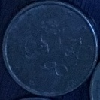

In [ ]:
cv2_imshow(test_data[69])

### Run inception network on newly cropped data

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

# Load the InceptionV3 model with weights pretrained on ImageNet
pre_trained_model = InceptionV3(weights='imagenet', include_top=False)

# Freeze all layers in the pre-trained model
for layer in pre_trained_model.layers:
    layer.trainable = False

# Add a Global Average Pooling layer
x = GlobalAveragePooling2D()(pre_trained_model.output)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = Dense(1024, activation='relu')(x)
# Add a dropout layer with a rate of 0.2
x = Dropout(0.2)(x)
# Add a final softmax layer for classification
predictions = Dense(15, activation='softmax')(x)

# Create the final model
inception_model = Model(inputs=pre_trained_model.input, outputs=predictions)


In [ ]:
# Compile the model
inception_model.compile(optimizer=RMSprop(lr=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Split your data into training and validation sets
train_X, valid_X, train_label, valid_label = train_test_split(train_data, train_labels_one_hot, test_size=0.2, random_state=13)


In [ ]:

# Train the model
inception_model.fit(train_X, train_label, batch_size=64, epochs=250, verbose=1, validation_data=(valid_data, valid_labels_one_hot))


Epoch 1/250
78/78 [==============================] - 4s 45ms/step - loss: 0.9046 - accuracy: 0.6893 - val_loss: 9.5451 - val_accuracy: 0.4132
Epoch 2/250
78/78 [==============================] - 3s 37ms/step - loss: 1.0222 - accuracy: 0.6920 - val_loss: 9.3733 - val_accuracy: 0.4174
Epoch 3/250
78/78 [==============================] - 3s 33ms/step - loss: 0.8929 - accuracy: 0.6932 - val_loss: 9.7693 - val_accuracy: 0.4090
Epoch 4/250
78/78 [==============================] - 3s 34ms/step - loss: 0.8878 - accuracy: 0.6906 - val_loss: 9.4213 - val_accuracy: 0.4202
Epoch 5/250
78/78 [==============================] - 3s 33ms/step - loss: 0.9726 - accuracy: 0.6821 - val_loss: 10.4761 - val_accuracy: 0.4258
Epoch 6/250
78/78 [==============================] - 3s 38ms/step - loss: 0.8995 - accuracy: 0.6879 - val_loss: 8.8526 - val_accuracy: 0.4244
Epoch 7/250
78/78 [==============================] - 3s 35ms/step - loss: 0.9017 - accuracy: 0.6893 - val_loss: 10.6283 - val_accuracy: 0.3950
Epoc

In [ ]:

# Evaluate the model on the test data
test_eval = inception_model.evaluate(test_data, test_labels_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

25/25 [==============================] - 2s 58ms/step - loss: 11.1444 - accuracy: 0.3700
Test loss: 11.144410133361816
Test accuracy: 0.3700384199619293


### Accuracy can be further improved by utitlising the following methods


*   Choosing a suitable Deep CNN architecture to classify
*   Increasing the size of the dataset
*   Augmenting the dataset
*   Performing better localization with YOLO (probably, with a higher confidence rate)



